# Histogram of SMDs per ANC

To contribute to discussions about the ideal size of ANCs, make a chart of the current distribution. 

In [1]:
import numpy as np
import pandas as pd
# import dataframe_image as dfi
from matplotlib import pyplot as plt

In [2]:
districts = pd.read_csv('../data/districts.csv')
redistricting_yr = 2012
districts = districts[districts.redistricting_year == redistricting_yr].copy()

In [3]:
anc_count = districts.groupby('anc_id').size()

In [4]:
stats = pd.DataFrame(anc_count.value_counts().sort_index(), columns=['N'])
stats['perc'] = stats['N'] / stats['N'].sum()
stats.loc[3] = 0
# stats.loc[11] = 0
stats = stats.loc[stats.index.sort_values()]
stats

,N,perc
2,1,0.025
3,0,0.000
5,4,0.100
6,2,0.050
7,16,0.400
8,7,0.175
9,3,0.075
10,4,0.100
12,2,0.050


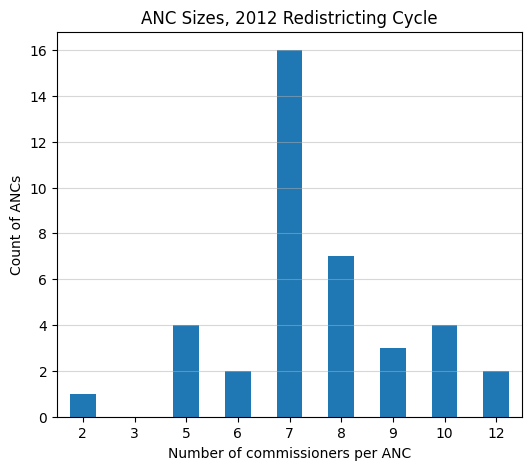

In [5]:
ax = stats['N'].plot(x=stats.index, kind='bar', figsize=(6,5))
ax.yaxis.grid(alpha=0.5)
plt.xticks(rotation=0)
plt.title(f'ANC Sizes, {redistricting_yr} Redistricting Cycle')
plt.xlabel('Number of commissioners per ANC')
_ = plt.ylabel('Count of ANCs')
plt.savefig(f'anc_histogram_{redistricting_yr}.png')

In [6]:
anc_count.min()

2

In [7]:
anc_count.median()

7.0

In [8]:
anc_count.max()

12

In [9]:
stats.N.sum()

39

## Breakout by Ward

Do different wards have odd numbers in their ANCs?

In [10]:
# Allocate the split ANCs entirely to the wards where most of their SMDs are located
districts_ward_allocated = districts.copy()

districts_ward_allocated.loc[districts_ward_allocated['smd_id'].isin([
    'smd_2022_3/4G05', 'smd_2022_3/4G06', 'smd_2022_3/4G07'
]), 'ward_id'] = 'ward_4_2022'

districts_ward_allocated.loc[districts_ward_allocated['smd_id'].isin([
    'smd_2022_8F04', 'smd_2022_8F05'
]), 'ward_id'] = 'ward_8_2022'

In [11]:
ward_anc_count = districts_ward_allocated.groupby(['ward_id', 'anc_id']).size().reset_index(name='N')

In [12]:
pivot_ward_anc = pd.pivot_table(
    data=ward_anc_count
    , index='ward_id'
    , columns='N'
    , aggfunc='size'
    , fill_value=0
)
pivot_ward_anc

N,2,3,4,5,6,7,8,9,10,12
ward_id,,,,,,,,,,
ward_1,0,0,0,1,0,0,1,0,0,2
ward_2,1,1,0,0,0,0,3,1,0,0
ward_3,0,1,0,2,0,1,0,1,1,0
ward_4,0,0,1,0,1,0,1,1,1,0
ward_5,0,0,0,1,0,2,1,0,1,0
ward_6,0,0,0,0,1,2,1,0,1,0
ward_7,0,0,0,0,0,5,0,0,0,0
ward_8,0,0,0,0,0,5,0,0,0,0


In [13]:
# pivot_ward_anc[4] = 0
# pivot_ward_anc[11] = 0
pivot_ward_anc = pivot_ward_anc[pivot_ward_anc.columns.sort_values()]

# pivot_ward_anc['Total'] = pivot_ward_anc.sum(axis=1)
# pivot_ward_anc.loc['Total'] = pivot_ward_anc.sum(axis=0)

pivot_ward_anc_styled = pivot_ward_anc.style.background_gradient(
    cmap='PuBu'
    , axis=None
)

# dfi.export(pivot_ward_anc_styled, 'pivot_ward_anc.png')
pivot_ward_anc_styled

N,2,3,4,5,6,7,8,9,10,12
ward_id,,,,,,,,,,
ward_1,0,0,0,1,0,0,1,0,0,2
ward_2,1,1,0,0,0,0,3,1,0,0
ward_3,0,1,0,2,0,1,0,1,1,0
ward_4,0,0,1,0,1,0,1,1,1,0
ward_5,0,0,0,1,0,2,1,0,1,0
ward_6,0,0,0,0,1,2,1,0,1,0
ward_7,0,0,0,0,0,5,0,0,0,0
ward_8,0,0,0,0,0,5,0,0,0,0


In [14]:
anc_count[anc_count == 10]

anc_id
anc_3D    10
anc_4C    10
anc_5E    10
anc_6B    10
dtype: int64